# 统计分析-回归分析与分类分析

# 0. 概述与大纲

## 0.1 从建模的目的看回归

回归分析与分类分析都是一种基于统计模型的统计分析方法。它们都研究因变量（被解释变量）与自变量（解释变量）之间存在的潜在关系，并通过统计模型的形式将这些潜在关系进行显式的表达。不同的是，回归分析中因变量是连续变量，如工资、销售额；而分类分析中因变量是属性变量，如判断邮件“是or否”为垃圾邮件。

上一段我们提到，回归是一种基于统计模型的分析方法，因此回归分析的过程本质上一种建模过程。统计建模的主要任务有二：预测与推断。

所谓预测，就是利用一个训练完毕的模型$\hat{f}$，根据输入的自变量$X$获得对应的输出$Y$。在预测任务中，如果模型$\hat{f}$可以准确地提供预测，那么$\hat{f}$是什么形式并不重要，而如果$\hat{f}$的形式非常复杂且难以解释，我们可以将之称为黑盒模型(Black Box)。举一个例子，假设$X_1,X_2,\cdots ,X_p$是某个病人的血样特征，$Y$测量了病人使用药物后出现严重不良反应的风险，那么如果存在一个模型可以很好地通过$X$以预测$Y$，那自然是再好不过的事了。此时，模型的形式、变量之间的关系在正确预测面前都显得不那么重要。事实上，当前具有强大预测性能的模型大多都是黑盒模型，如强大的Xgboost机器学习算法以及各种深度学习算法，它们的模型可解释性差，我们难以解释其中一些参数的含义与统计性质。

与预测相对应的另一任务便是推断。在很多情况下，我们对当$X_1,X_2,\cdots ,X_p$变化时**如何影响**$Y$更感兴趣，此时，我们估计模型$\hat{f}$的目的不是为了预测$Y$，而是想明白两者之间的关系，更深层次地讲，我们想要知道模型内各种参数的数值与统计推断性质等等。在这种情况下，模型的可解释性就非常重要了，而通常我们在推断任务中最常使用的模型正是线性回归模型。举一个例子，在研究各因素对商品销售量的场景中，我们会更关注以下问题：哪类媒体对销量有直接的贡献？增加电视广告费用能对销售量带来多少程度的增加？等等，这就是典型的推断问题。

弄清楚了预测与推断的区别，我们重新审视一下回归分析：回归分析更加注重对因变量与自变量之间潜在关系的推断，所使用的统计模型也相对简单（一般为线性模型），如果你在比赛中需要分析各变量间的潜在相关关系，便可以考虑使用回归分析。





## 0.2 课程大纲

在本轮课程，我们将先后学习回归分析与分类分析的知识。其中，回归分析中我们主要学习经典线性模型(CLM, Classical Linear Model)与最小二乘估计(OLS)，广义线性模型(GLM)只做简单介绍；分类分析中我们主要学习基于线性模型的Logistics模型与Probit模型。具体大纲如下：

· 回归的思想与线性回归模型介绍

· OLS估计在经典线性回归模型假设下的统计推断

· 线性回归模型中的参数检验

· 线性回归模型设定的误差分析

· 异方差下回归建模的解决方法

首先，我们将了解回归的基本思想，并对最常用的回归模型-经典线性模型的模型形式、模型假设（也称为CLM假设）做基本的介绍。

知晓了模型的形式后，下一步自然是进行模型参数的估计，并推断估计参数的统计性质。在线性模型中，这些参数就是每个自变量的系数，我们想知道：使用何种方法进行参数估计呢？参数在这种估计方法下能否接近真实参数呢？估计的误差有多大呢？我们将学习使用最小二乘法(OLS)对线性模型进行估计，并探究OLS估计下各参数的统计性质。可以告诉大家，在满足CLM假设的前提下，OLS估计是经典线性模型最优的参数估计法；基于CLM假设与OLS估计，我们便可以对模型进行各种假设检验，包括参数显著性检验，模型显著性检验等等。

然而，理想很丰满，现实很骨感，我们所获得的实验数据不总是能满足CLM假设中的每一条假设。某个假设不成立会给模型参数估计的准确性（无偏性）、稳定性（方差）以及假设检验带来多少影响呢？这就是模型设定误差分析需要研究的内容。最后，若数据不满足CLM假设中的某个假设，需要找到对应的解决办法，在本轮课程，我们重点探讨不满足同方差假设下参数估计方法与参数检验方法的改进。

# 1. 回归模型总述

在这一章节，我们将对“回归”进行宏观的介绍，使大家对回归有直观的理解。

## 1.1 回归思想与一般回归模型

### 1.1.1 横截面数据

横截面数据是回归分析最主要的分析数据类型，它可以视为在**同一时间点（或抽样时间差异可以被忽略）**上对**多个抽样个体**的观测数据。通常，我们记第$i$个个体的观测数据为$(x_i,y_i)$。如果以抽样时间点与抽样个体数目为维度划分数据类型，除了横截面数据外，还有时间序列数据以及面板数据。时间序列数据为单个个体在不同时间点上的观测数据，而面板数据则是多个个体在不同时间点上的观测数据。对时间序列数据的分析需要用到时间序列分析的知识，对面板数据的分析则是高级计量经济学的内容，在本次课程我们不对它们做介绍。三者的区别如下图所示：

In [2]:
%%html
<img src='横截面数据.png'>

### 1.1.2 回归思想——条件均值建模

横截面数据最重要的一个特征，就是我们可以将采集的数据$(x_1,y_1),(x_2,y_2),…,(x_n,y_n)$近似视为来自一个潜在总体的随机样本，即假设
$$
\left(x_{1}, y_{1}\right), \cdots,\left(x_{n}, y_{n}\right) \sim^{i i d}(x, y)
$$
我们进行数据分析的最终目的是为了找到$x$与$y$之间的关系并用模型显性表示出来，此时最理想的状态是使用一个**条件分布**刻画$x$对$y$的影响
$$
F_{y \mid x}
$$
即在任意给定$x$的条件下都有一个明确的分布$F$刻画$y$的状态。但是在实际问题中，直接估计这个条件分布几乎是一件不可能的事，且我们也难以对分布进行解释与应用。于是，我们退而求其次通过分布的一般数字特征对两者的关系进行推断，如条件分布的中心位置，形状，即考虑**条件均值、条件方差**
$$
E(y \mid x), \operatorname{Var}(y \mid x)
$$
而回归正是利用条件均值$E(y \mid x)$来刻画$x$与$y$的关系，回归建模的本质也正是“条件均值的建模”。那么，怎么理解条件均值建模呢？我们举一个不典型的例子帮助大家理解。

假设某个样本量为100的数据集中，自变量$x$有1,2,3,4,5五个值，样本的因变量$y$都来自以其自变量为均值，方差为1的正态分布。我们想要刻画因变量与自变量之间的变化关系，就要找出可以代表各种类样本内（在此例中以自变量为划分依据）共性的特征，用这些特征来描绘变化关系。最直观也是最简单的特征就是条件均值，即给定$x$的条件下样本的均值。


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from IPython.display import display

Text(0.5, 1.0, 'E(Y|X)')

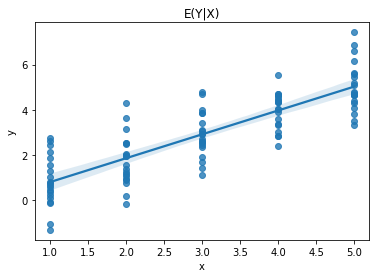

In [4]:
x=list()
y=list()
for i in [1,2,3,4,5]:
    y_norm=stats.norm.rvs(i,1,20,random_state=i).tolist()
    y.extend(y_norm)
    x1=np.ones(20)*i
    x1=x1.tolist()
    x.extend(x1)

data={'x':x,'y':y}
df=pd.DataFrame(data)

sns.regplot(x='x',y='y',data=df)
plt.title('E(Y|X)')

根据上图我们可以看出，$E(y|x=1)=1$,$E(y|x=2)=2$,…,$E(y|x=x_0)=x_0$。通过条件均值，我们可以推断出$x$与$y$的关系可以用模型$y=x+u$来刻画，其中，$u$被称为随机误差，可理解为：除$x$外，其他影响$y$取值的因素。

### 1.1.3 一般回归模型

在上述例子中，我们使用模型$y=x+u$刻画了$x$与$y$的关系，这说明了在这个数据集中我们将模型设定为了
$$
y=x+u
$$
事实上，如果我们将上述公式中的$x$泛化成条件均值$E(y|x)$，那么我们就能得到最一般的回归模型
$$
y=E(y|x)+u
$$
这也就意味着，所谓回归模型的建模，**本质上就是条件均值建模**

**· 回归模型的条件解读**

一般回归模型$y=E(y|x)+u$暗含了一个天然成立的假设：
1. 随机误差的条件期望$E(u|x)=0$

利用重期望公式，我们可以根据假设1进一步推得下面两个推论:

推论1. 随机误差的无条件期望$E(u)=0$——这表示其他因素对$y$的平均影响为0
<br>
推论2. 随机误差$u$与自变量$x$协方差$Cov(u,x)=0$——这表示其他因素与参与回归的$x$不相关！

根据假设1，我们可以将一般回归模型表示成一种新的形式：
$$
y=E(y|x)+u\Longleftrightarrow y=m\left( x \right) +u, where\,\,E\left( u|x \right) =0
$$
在这里，$E(u|x)=0$等价于$m(x)=E(y|x)$。事实上，用这一种形式表示回归模型更常见，也更有利于接下来对模型$m(x)$具体形式的假定，因为这告诉了我们：只要假定随机误差$u$与$x$不相关（这里可理解为其他影响$y$的外生因素与内生因素$x$不相关），我们就可以根据需要假定回归模型的具体形式。

## 1.2 线性回归模型

### 1.2.1 线性模型形式

上面的学习中我们介绍了回归模型的一般形式。在实际建模中，为了有效的估计，我们必须对模型中$m(x)$的形式进行具体的假定。在所有模型假定形式中，线性回归模型是最常用假定形式，也是回归分析中最重要的模型，是本次课程重点讲解的内容。

线性模型假设有：
$$
m(x)=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{p} x_{p}
$$
于是，线性回归模型可表示为：
$$
y=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{p} x_{p}+u, \quad E\left(u \mid x_{1}, \cdots, x_{p}\right)=0
$$
回归分析主要研究如何有效地估计模型中的参数$\hat{\beta}_i$，并利用模型进行推断与预测。

### 1.2.2 从简单线性回归到多元线性回归

**· 用简单线性回归理解对模型的解释**

为大家快速理解线性回归模型，我们先假设$x$是一维的，即只考虑一个因素对$y$的影响，此时亦称模型为简单线性回归，形式为
$$
y=\beta_{0}+\beta_{1} x+u, \quad E(u \mid x)=0
$$
$\beta_{0}$是截距项，可以理解为$x=0$时$y$的期望值，一般情况下，如果我们回归的任务是推断，则截距通常不重要；
<br>
$\beta_{1}=\frac{\Delta m(x)}{\Delta x}$，可理解为$x$每增加一个单位，$y$**平均**增加$\beta_1$个单位。

此后，我们将默认模型含有$E(u|x)=0$的设定（因为只有这样模型才代表回归模型），该条件不再以书面形式写出。

我们举一个例子帮助大家理解：

**Example1.** 假设大学成绩colGPA与大学测验水平ACT间关系为
$$
\text { colGPA }=\beta_{0}+\beta_{1} \text { hsGPA }+u
$$
$\beta_1$系数的解释为：每增加1单位大学测验水平，大学成绩会增加$\beta_1$个单位；由于该模型中自变量只有高中成绩，而大学成绩水平肯定还受其他因素影响，因此该模型中的随机误差包含了如高中成绩、自主学习能力等因素。

注意：设定$E(u|x)=0$的存在暗含了**在该模型中**高中测验成绩、自主学习能力等因素与自变量大学测验水平无关，但这在**实际问题中**未必成立。而一旦它们存在相关性，就意味着模型假设不符合实际情况，模型估计的有效性与准确性也将受到影响。

**· 进行全面的回归建模——多元线性回归**

单纯的简单线性模型有很大的局限性，原因有二：

1、在实际问题中，因变量$y$通常受多个因素影响，这些因素之间可能彼此之间存在线性相关性（后续的学习中我们将这种现象称为多重共线性），而默认假设$E(u|x)=0$的直接推论(推论2)就是其他影响因素与$x$线性无关，显然不一定符合实际情况。

2、如果我们想推断一个变量对另一个变量的因果关系，就要保持尽可能多的其他因素的不变，因此需要尽量把关键因素纳入到回归模型当中，这样便可以控制多个变量，查看某个特定变量变化对自变量的影响。

因此在实际问题中，我们更多地使用多元线性回归。一般的多元线性回归模型可写成：
$$
y=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{k} x_{k}+u
$$
$u$依旧为随机误差项，它表示除$x_1$,…,$x_k$以外的其他因素对因变量$y$的影响，且同样满足假设
$$
E\left(u \mid x_{1}, \cdots, x_{k}\right)=0
$$
$\beta_i=\frac{\partial m\left( x \right)}{\partial x_i}$是回归函数对变量$x_i$的偏导数，它被解释为**在保持其他自变量不变的情况下，$x_i$每增加一单位，$y$平均增加$\beta_i$个单位**

**· Example2.** 依旧以上面的大学成绩例子为例，这一次我们增加一个高中成绩hsGPA变量，此时模型变为
$$
\mathrm{colGPA}=\beta _0+\beta _1\mathrm{hsGPA}+\beta _2\mathrm{ACT}+u
$$
在模型增加了一个我们认为非常重要的变量后，模型的估计会产生怎样的变化呢？我们使用python对该例的数据集进行回归分析，比较两种模型的区别。具体的python实现过程我们将稍后介绍，大家只需要关注这里的结果即可。

In [5]:
import statsmodels.api as sm

In [6]:
# 加载数据
gpa1=pd.read_stata('gpa1.dta')

# 在数据集中提取自变量
X1=gpa1.ACT
X2=gpa1[['ACT','hsGPA']]
# 提取因变量
y=gpa1.colGPA

# 为自变量增添截距项
X1=sm.add_constant(X1)
X2=sm.add_constant(X2)
display(X2)

,const,ACT,hsGPA
0,1.0,21.0,3.0
1,1.0,24.0,3.2
2,1.0,26.0,3.6
3,1.0,27.0,3.5
4,1.0,28.0,3.9
...,...,...,...
136,1.0,23.0,3.3
137,1.0,25.0,3.6
138,1.0,21.0,3.4
139,1.0,26.0,3.7


In [7]:
# 拟合两个模型
gpa_lm1=sm.OLS(y,X1).fit()
gpa_lm2=sm.OLS(y,X2).fit()

# 输出两个模型的系数与对应p值
p1=pd.DataFrame(gpa_lm1.pvalues,columns=['pvalue'])
c1=pd.DataFrame(gpa_lm1.params,columns=['params'])
p2=pd.DataFrame(gpa_lm2.pvalues,columns=['pvalue'])
c2=pd.DataFrame(gpa_lm2.params,columns=['params'])
display(c1.join(p1,how='right'))
display(c2.join(p2,how='right'))

,params,pvalue
const,2.402979,8.798591e-16
ACT,0.027064,1.389927e-02


,params,pvalue
const,1.286328,0.000238
ACT,0.009426,0.383297
hsGPA,0.453456,0.000005


我们发现，变量ACT在两个回归模型中的系数并不一致，且其在单独回归时变量显著，但增添了变量hsGPA后变得不显著。这说明多个变量共同回归绝不等同于多个变量各自进行单变量回归，且在后面的课程中我们会知道将多个重要变量都纳入回归模型的重要性。总之，大家在此只需要知道：**多元线性回归非常重要，后续的学习也将围绕多元线性回归展开！**

# 2. 模型系数的估计方法——OLS估计及其性质

在第一章，我们了解了回归的本质——条件均值建模、介绍了最经典的回归模型——（多元）线性回归模型的形式、参数解释与一些注意事项。那么接下来有一个非常自然而然的问题摆在我们面前——你这个线性回归模型里的参数是使用什么方法计算出来的呢？按照你这种方法计算出来的参数是否可靠呢？它们又具备哪些统计性质呢？那么这一章，我们将学习线性回归中最常用、最经典的系数估计方法——普通最小二乘估计法(Ordinary Least Squares, OLS)

## 2.1 OLS估计的思想与原理

### 2.1.1 OLS估计的思想

我们用一个关于储蓄与收入间关系的例子解释ols估计的思想。将储蓄savings视作因变量$y$，将收入income视作自变量$x$，由于只有一个自变量，因此可用简单线性回归模型假设两者关系为$y=\beta_{0}+\beta_{1} x+u$，即一条带有趋势与截距的直线。那么，这条直线应该“长成”怎样才算是一条“好的直线”呢？直观上看，最佳的拟合直线应该尽可能的贴合样本点，如下图所示

In [8]:
%%html
<img src='ols.png'>

直线尽可能贴合样本点，意味着在所有直线当中，我们要选出一条离所有样本点距离的总和最小的直线。那么，这个距离该如何衡量？我们将模型回归参数分别记为$\hat{\beta}_{0}$，$\hat{\beta}_{1}$，并定义$\hat{y}_{i}=\hat{\beta}_{0}+\hat{\beta}_{1} x_{i}$为样本在自变量为$x_i$下的拟合值，记样本实际观测值$y_i$与拟合值$\hat{y}_{i}$之差为拟合残差$
\hat{u}_{i}=y_{i}-\hat{y}_{i}$。

不同的距离定义方法是不同估计法的一大区别，OLS对距离的定义是：残差的平方${\hat{u}_i}^2$。因此OLS估计的思想是：**OLS估计求得的系数$\hat{\beta}_{0}$、$\hat{\beta}_{1}$，将使直线与所有样本的拟合残差的平方和最小**，即
$$
\left(\hat{\beta}_{0}, \hat{\beta}_{1}\right)=\operatorname{argmin} \sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i}\right)^{2}
$$
对于多元线性回归，OLS估计的思想也完全相同，只不过多元线性回归的模型不是一条直线，而是一个多维的超平面。对于多元线性回归的OLS估计目标函数，有
$$
\left( \hat{\beta}_0,\cdots ,\hat{\beta}_k \right) =\mathrm{arg}\min \sum_{i=1}^n{\left( y_i-\hat{\beta}_0-\hat{\beta}_1x_{1i}-\hat{\beta}_kx_{ki} \right) ^2}
$$

### 2.1.2 OLS估计的求解

**· 从优化角度看OLS求解**

我们在上面知晓了需要求解的函数后，接下来就要开始进行求解了。

记目标函数为
$$
Q\left(\hat{\beta}_{0}, \hat{\beta}_{1}, \cdots, \hat{\beta}_{k}\right)=\sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i 1}-\cdots-\hat{\beta}_{k} x_{i k}\right)^{2}
$$
这是一个以$(\hat{\beta}_{0}, \hat{\beta}_{1}, \cdots, \hat{\beta}_{k})$作为未知变量的多元函数，我们要求得最小值点，可以令各元偏导数等于0，构建一个$k+1$维的方程组求解：
$$
\begin{aligned}
&\sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i 1}-\cdots-\hat{\beta}_{k} x_{i k}\right)=0 \\
&\sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i 1}-\cdots-\hat{\beta}_{k} x_{i k}\right) x_{i 1}=0 \\
&\sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i 1}-\cdots-\hat{\beta}_{k} x_{i k}\right) x_{i 2}=0 \\
&\cdots \quad \cdots \\
&\sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i 1}-\cdots-\hat{\beta}_{k} x_{i k}\right) x_{i k}=0
\end{aligned}
$$
以上方程组中，每个方程有$k+1$个自变量，且有$k+1$个方程，根据线性代数的知识，我们可以求得$(\hat{\beta}_{0}, \hat{\beta}_{1}, \cdots, \hat{\beta}_{k})$的唯一解

**· OLS求解的矩阵表示**

上述思路证明了OLS估计求解系数的可行性，但是我们还不知道系数估计的具体形式，接下来我们就利用矩阵的形式给出OLS求解的结果。求解过程无需掌握，但大家需要大致了解每个数学符号的含义与指代，在后续的理论介绍时，它们会被反复提及。

由于我们有$n$个样本，因此根据模型有以下$n$个等式成立
$$
y_{i}=\beta_{0}+\beta_{1} x_{i 1}+\cdots+\beta_{k} x_{i k}+u_{i}, \quad i=1, \cdots, n
$$
将它们联立称方程组，并表示成矩阵形式
$$
\boldsymbol{y}=\boldsymbol{X\beta }+\boldsymbol{u}
$$
这里，$\boldsymbol{y}=\left( y_1,y_2,\cdots ,y_n \right) ^{'},\quad \boldsymbol{\beta} =\left( \beta _0,\beta _1,\cdots ,\beta _k \right) ^{'},\quad \boldsymbol{u}=\left( u_1,u_2,\cdots ,u_n \right) ^{'}$。
<br>
并记：$x_{i}^{\prime}=\left(1, x_{i 1}, x_{i 2}, \cdots, x_{i k}\right), \boldsymbol{X}=\left(x_{1}^{\prime}, x_{2}^{\prime}, \cdots, x_{n}^{\prime}\right)^{\prime}$，值得注意的是，$\boldsymbol{X}$是一个$n\times \left( k+1 \right) $维的矩阵，n为样本个数，k为自变量个数，它也被称为设计阵。

以上是真实模型的矩阵表示形式，对于我们实际拟合的模型及其残差，其矩阵形式则为
$$
\boldsymbol{\hat{y}}=\boldsymbol{X\hat{\beta}},\quad \boldsymbol{\hat{u}}=\boldsymbol{y}-\boldsymbol{\hat{y}}
$$
根据令残差平方和偏导数为0的思想，有
$$
Q(\hat{\beta})=\sum_{i=1}^{n} \hat{u}_{i}^{2}=\hat{u}^{\prime} \hat{u}=(y-X \hat{\beta})^{\prime}(y-X \hat{\beta})=y^{\prime} y-2 \hat{\beta}^{\prime} X^{\prime} y+\hat{\beta}^{\prime} X^{\prime} X \hat{\beta}
$$
运用向量求导的知识得
$$
X^{\prime} X \hat{\beta}=X^{\prime} y \Rightarrow \hat{\beta}=\left(X^{\prime} X\right)^{-1} X^{\prime} y
$$
至此，我们就得到了各系数估计向量$\hat{\beta}$的矩阵表达式了。



In [9]:
# 矩阵求解

### 2.1.3 拟合优度

对于多元线性模型
$$
y=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{k} x_{k}+u
$$
我们使用OLS得到了一个拟合模型
$$
\hat{y}=\hat{\beta}_0+\hat{\beta}_1x_1+\cdots +\hat{\beta}_kx_k
$$
一个很自然的问题是：这个模型对数据的拟合效果如何？这个问题可以进一步引申为：模型中的自变量$x_i$在多大程度上解释了$y$的变异？（$y$的趋势变化可以理解为是一种带有规律性的变异）

在探讨这个问题前，我们先引入几个简单而又重要的概念。

· TSS(Total sum of squares)，总平方和
$$
T S S=\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}
$$

· ESS(Explained sum of squares)，解释平方和
$$
E S S=\sum_{i=1}^{n}\left(\hat{y}_{i}-\bar{y}\right)^{2}
$$

· RSS(Resiual sum of squares)，残差平方和
$$
R S S=\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}
$$
直观上RSS是一个可以度量拟合优度的量，因为残差平方和越小，意味着预测值与真实值之间的差距越小。但是RSS的大小没有一个标准，它将随着样本量的增大而增大，因此单纯的RSS不是一个合格的衡量拟合优度的量。

这个时候我们可以从另一个角度去理解回归建模的意义。我们之所以想构建模型，是因为想找到**造成$y$值变化**的因素，模型解释的变异占总变异的比例越多，这个模型的解释力度就越大，模型的拟合优度也就越好。我们举一个简单的例子：某天，一个村子的菜包子涨了1块钱，大家都想知道究竟是什么原因导致这1块钱的涨幅。小红和小明综合了当天所有发生变化的外因素（其实就是自变量啦~），分别构建了两个模型将这些外因素的变化和菜包子涨价的1块钱联系在一起。在小红的模型预测下，这些外因素变化会使菜包子涨价0.99块钱，而小明的模型则只预测到了0.1块钱的涨价。我们认为，小红的模型解释1块钱涨价中的0.99块，而小明只解释了0.1块，因此小红的模型更优。

**· 回归拟合优度——R方**

理解了用“解释变异的比例”衡量回归模型拟合优度的思想，构造拟合优度就有思路了。回归分析中最常用的拟合优度是R方，定义为
$$
R^{2}=\frac{E S S}{T S S}
$$
其中，TSS度量了因变量$y$的总样本变异，而ESS度量了模型拟合值$\hat{y}$的总变异，也就是解释了的变异。事实上三种平方和存在关系$TSS=RSS+ESS$（大家可以尝试自己推导），这说明：总变异可以被拆分为解释了变异和未被解释的变异，残差平方和度量了“剩余信息”。

In [10]:
# 动手计算模型gpa_lm2的R方
TSS_gpa=np.sum(np.power(gpa1.colGPA-np.mean(gpa1.colGPA),2))
RSS_gpa=np.sum(np.power(gpa_lm2.resid,2))
gpa_lm2_R2=1-RSS_gpa/TSS_gpa
print('手动计算的R方为：{}'.format(gpa_lm2_R2))
print('-------------------------------------------------')
# 直接输出模型gpa_lm2的R方
gpa_lm2_R2=gpa_lm2.rsquared
print('软件计算的R方为：{}'.format(gpa_lm2_R2))

手动计算的R方为：0.1764216724583183
-------------------------------------------------
软件计算的R方为：0.17642159463450557


两者结果十分接近，之所以不完全相同可能是numpy计算与statsmodels计算存在小差异。

### 2.1.4 OLS估计的代数性质

使用OLS估计对线性回归模型进行参数估计，估计出来的模型将有许多重要的特性与性质。其中有的性质是OLS估计自身求解过程所带来的，我们称之为代数性质，这部分性质是天然成立的；而有的性质只有在某些特定的模型假设下才能成立，一旦实际数据违反了假设，这些性质将不再成立。

在这一小节，我们将简单学习OLS估计的代数性质。

**· 代数性质**

OLS估计的代数性质来自于其本身求解过程中的方程组。我们观察一下上面的方程组，可以很快地总结出以下两条公式
$$
\begin{aligned}
	&\sum_{i=1}^n{\left( y_i-\hat{\beta}_0-\hat{\beta}_1x_{i1}-\cdots -\hat{\beta}_kx_{ik} \right)}=\sum_{i=1}^n{\hat{u}_i}=0\\
	&\sum_{i=1}^n{\left( y_i-\hat{\beta}_0-\hat{\beta}_1x_{i1}-\cdots -\hat{\beta}_kx_{ij} \right)}x_{ij}=\sum_{i=1}^n{\hat{u}_i}x_{ij}=0, j=1,\cdots ,k\\
\end{aligned}
$$
第一条公式意味着：OLS估计预测残差之和为0；此外，这可以推出预测残差的均值也为0，即$\bar{\hat{u}}=0$。我们以之前的gpa1回归建模为例，看看模型在python中实际计算出来的残差之和是否为0

In [11]:
print('简单回归模型的残差和（保留四位小数点）：{:.4f}'.format(sum(gpa_lm1.resid)))
print('多元回归模型的残差和（保留四位小数点）：{:.4f}'.format(sum(gpa_lm2.resid)))

简单回归模型的残差和（保留四位小数点）：-0.0000
多元回归模型的残差和（保留四位小数点）：-0.0000


第二条公式可以进行以下恒等推导：
$$
\sum_{i=1}^n{x_{ik}}\hat{u}_i=\sum_{i=1}^n{x_{ik}}\left( \hat{u}_i-\bar{\hat{u}} \right) =\sum_{i=1}^n{\left( x_{ik}-\bar{x} \right)}\left( \hat{u}_i-\bar{\hat{u}} \right) =Cov\left( x_k,\hat{u} \right) =0, j=1,\cdots ,k
$$
这是OLS估计最重要的代数性质，它意味着OLS估计的残差与参与回归的自变量不相关。这预示着：如果我们消除因变量$y$与某些自变量$x_j$之间的线性相关性，可以先进行线性回归然后取残差！

In [12]:
# 定义计算残差的计算函数
from pylab import *
def de_mean(x):
    xmean = np.mean(x)
    return [xi - xmean for xi in x]

# 定义计算样本协方差的计算函数
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

print('回归模型中残差与自变量hsGPA的样本协方差为（保留四位小数点）：{:.4f}'.format(covariance(gpa_lm2.resid,gpa1.hsGPA)))

回归模型中残差与自变量hsGPA的样本协方差为（保留四位小数点）：-0.0000


## 2.2 经典线性模型假设下OLS估计的性质 

### 2.2.1 经典线性模型假设-CLM假设

CLM假设总共有六条，在六条假设下OLS估计具有非常优良的性质，接下来让我们看看这六条假设是什么，每条意味着什么。

**· MLR.1 总体模型假设** 

总体模型可以写为
$$
y=\beta_{0}+\beta_{1} x_{1}+\beta_{2} x_{2}+\cdots+\beta_{k} x_{k}+u
$$
该假设假定了我们正确地判断了因变量和自变量之间的关系——既正确设定了模型形式为上述的线性形式，又正确纳入了所有自变量。

**· MLR.2 随机误差条件均值零假设**

随机误差$u$满足
$$
E\left(u \mid x_{1}, \cdots, x_{k}\right)=0
$$
我们在前面的小节提到过这一假设的推论，它意味着所有非自变量的其他因素都与自变量线性无关。

**· MLR.3 随机抽样假设**

$n$个来自上述总体的样本均为随机抽样样本，彼此之间相互独立

**· MLR.4 非完全共线性假设**

这些样本的所有自变量间不能存在有完全共线性，即不能存在某一自变量可由其余自变量进行线性表示的情况。数学语言为：不存在不全为零的$a_{0}, a_{1}, \cdots, a_{k}$使得
$$
a_{0}+a_{1} x_{i 1}+a_{2} x_{i 2}+\cdots+a_{k} x_{i k}=0, \forall i=1, \cdots, n
$$
**· MLR.5 同方差假设**

随机误差$u$的条件方差恒为一个常数，即
$$
\operatorname{Var}\left(u \mid x_{1}, \cdots, x_{k}\right)=\sigma^{2}
$$
根据条件方差的性质，上述等式可等价为(大家可以想想为什么会这样呢？)
$$
\operatorname{Var}\left(y \mid x_{1}, \cdots, x_{k}\right)=\sigma^{2}
$$
同方差假设看起来有一点点抽象，但其实它非常好理解也非常直观——数据的波动程度不受自变量影响，不论$x_i$如何变化，数据与样本条件均值的偏离程度都是恒定的。我们看看以下两张对比图，直观地感受同方差与异方差的区别。


In [13]:
%%html
<img src='同方差.png'>

随着$X$的增大，左图样本数据间的距离越来越大，这是方差越来越大的体现；而右图样本数据间的距离则相对稳定，这说明它们的方差相对稳定。

**· MLR.6 正态性假设**

该假设假定随机误差$u$在任何自变量$x$已知的条件下服从正态分布
$$
u \mid x \sim N\left(0, \sigma^{2}\right)
$$
这一假设实际上是MLR.2与MLR.5假设的升级版，即在随机误差$u$的零条件期望与恒定条件方差的基础上，增加了一个服从条件正态分布的假设。

以上六个假设是一种非常严格、理想化的假设，只有在这些假设成立的基础上我们才能对OLS估计在线性回归模型上的性质作进一步的研究。当然，实际的数据并不一定都能满足这些假设，有关样本数据是否可以满足这些假设的识别检验、不满足假设的后果以及改进方案，我们将在以后的章节学习。接下来，对于一个样本数据，请大家默认其满足CLM假设，我们将见识到OLS系数估计法在CLM假设下的优越性。


### 2.2.2 OLS估计的性质-最优的线性无偏估计

我们之所以对样本数据进行建模并估计模型的系数，是因为我们认为存在一个潜在的、**正确的**模型（函数）可以描述这些数据的特征。在回归任务中，这个我们假定正确的函数被称为**总体回归函数**
$$
y=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{k} x_{k}+u
$$
而我们使用各种模型估计方法得出的对这个总体回归函数的函数则被称为**样本回归函数**
$$
\hat{y}=\hat{\beta}_0+\hat{\beta}_1x_1+\cdots +\hat{\beta}_kx_k
$$
对于一个样本回归函数而言，怎样子的函数才算是好函数呢？答案当然是，各估计系数$\hat{\beta}$都尽可能接近真实系数$\beta$；并且使用同一总体的不同取样样本进行估计时，估计出来的系数越稳定越好。而OLS估计在这两方面的表现都非常不错。

**· OLS系数估计的无偏性**

**定理1.** 在CLM假设**MLR.1-MLR.4**下，$\hat{\beta}$是$\beta$的无偏估计，即
$$
E\left(\hat{\beta}_{j}\right)=\beta_{j}, \forall j=0,1, \cdots, k
$$
证明见附录

无偏性意味着我们使用OLS进行多次试验后，估计出来的系数均值与参数的真实值是吻合的，这是一件激励人心的事，这说明我们估计出来的系数非常接近真实系数！接下来我们看看估计系数的稳定性——方差。


**· OLS系数估计的方差**

我们先看一下CLM假设下，OLS估计系数的**方差与标准误**具体为多少。

**· 定理2.** 在CLM假设**MLR.1-MLR.5**（增加了同方差假设MLR.5)下，$\hat{\beta}$的方差-协方差矩阵表达式为
$$
\operatorname{Cov}(\hat{\beta})=\sigma^{2}\left(X^{\prime} X\right)^{-1}
$$
其中，$X$为设计阵；$\sigma^{2}$为同方差假设$\operatorname{Var}\left(u \mid x_{1}, \cdots, x_{k}\right)=\sigma^{2}$中的随机误差的方差。

由于$\hat{\beta}$向量的协方差矩阵对角线就是每个系数的方差，因此有OLS估计的方差以及标准差(SD,Standard Deviation)
$$
\operatorname{Var}\left(\hat{\beta}_{j}\right)=\sigma^{2}\left(X^{\prime} X\right)_{j+1, j+1}^{-1}
$$
$$
\operatorname{sd}\left(\hat{\beta}_{j}\right)=\sigma \sqrt{\left(X^{\prime} X\right)_{j+1, j+1}^{-1}}
$$
我们已经知道了各估计系数$\hat{\beta}_{j}$的方差表达式了，但是还有最后一个问题需要解决：$\sigma^{2}$是我们假设的一个参数，实际我们并不知道它是多少，因此我们要给出它的估计。

既然$\sigma^{2}$是随机误差的方差，那么它的估计形式总体上应该遵循样本方差的形式，即有这样的形式
$$
\hat{\sigma}^2=\frac{1}{df}\sum_{i=1}^n{\left( \hat{u} \right) ^2}
$$
其中，$df$是自由度，它一般是样本个数与待估计参数个数的差。而对于随机误差的估计形式$\hat{u}$，我们回想一下随机误差的含义：它是样本真值$y$与总体回归函数$m(x)$的偏差，其构造是不是与残差十分相似呢？因此在对随机误差的估计中，我们就用残差代替随机误差，故有
$$
\hat{\sigma}^{2}=\frac{1}{n-k-1} \sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i 1}-\cdots-\hat{\beta}_{k} x_{i k}\right)^{2}=\frac{RSS}{n-k-1}
$$
$\hat{\sigma}$被称为回归标准误(standard error of regression)，我们将$\hat{\sigma}$带入到上述的标准差$\operatorname{sd}\left(\hat{\beta}_{j}\right)$当中，得到的结果被称为估计系数的标准误(standard error)
$$
\operatorname{se}\left(\hat{\beta}_{j}\right)=\hat{\sigma} \sqrt{\left(X^{\prime} X\right)_{j+1, j+1}^{-1}}
$$
在这里我们需要明确地指出，因为$\sigma$的未知性，估计系数标准差$\operatorname{sd}\left(\hat{\beta}_{j}\right)$是在实际中无法得知的，python软件也不会输出这个指标。只有估计系数标准误$\operatorname{se}\left(\hat{\beta}_{j}\right)$才是明确的！

**· 定理3.** 在CLM假设**MLR.1-MLR.5**下，$\hat{\sigma}^{2}$是$\sigma^{2}$的无偏估计，即
$$
E\left(\hat{\sigma}^{2}\right)=\sigma^{2}
$$
这个定理表明，在CLM假设下，我们上述对随机误差的方差的估计是“准确的”。

In [14]:
# 依旧以gpa_lm2模型为例
# 手动计算标准误，并比较python直接输出的结果

# 回归标准误
## 手动计算
df=gpa_lm2.df_resid # 计算自由度
sigma=RSS_gpa/df
print('手动计算的回归标准误：{}'.format(sigma))
## 软件输出
sigma2=gpa_lm2.scale
print('软件计算的回归标准误：{}'.format(sigma2))
print('-------------------------------------------------')

# 变量ACT系数的标准误
## 手动计算
X2_T=X2.values.T
X_inv=np.linalg.inv(np.dot(X2_T,X2)) # 求矩阵乘积的逆矩阵
se_beta1=np.sqrt(sigma*X_inv[(1,1)])
print('手动计算的ACT系数标准误：{}'.format(se_beta1))

## 软件输出
se_beta1=gpa_lm2.bse[1]
print('软件计算的ACT系数标准误：{}'.format(se_beta1))

手动计算的回归标准误：0.1158148144382463
软件计算的回归标准误：0.1158148144382463
-------------------------------------------------
手动计算的ACT系数标准误：0.010777187759672815
软件计算的ACT系数标准误：0.010777187759672789


我们也可以直接使用接口summary来直观的展示模型拟合的各种指标结果。

In [15]:
print(gpa_lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     14.78
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           1.53e-06
Time:                        11:57:07   Log-Likelihood:                -46.573
No. Observations:                 141   AIC:                             99.15
Df Residuals:                     138   BIC:                             108.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2863      0.341      3.774      0.0

我们在前面使用代码实现的各种指标，大部分都可以在summary汇总表格中找到。如R-squared就是R方，Df Residuals就是模型自由度；估计系数部分，第一列是系数的估计值，第二列是估计系数的标准误，第三第四列则是我们在下一章节介绍的系数显著性指标。

**· OLS系数估计的最优线性无偏性**

在MLR.1-MLR.4下，我们知道了OLS估计是无偏的；在MLR.1-MLR.5下，我们得出了OLS估计方差的表达式。那么在这里我们要告诉大家，在所有无偏估计当中，OLS估计是最优的，因为有如下定理

**· Gauss-Markov定理.** 在CLM假设**MLR.1-MLR.5**下，在$\beta$的所有线性无偏估计类当中，OLS估计的方差最小。即假设另有无偏估计$\tilde{\beta}_{j}$，若它可以表示为$y_i$的线性组合，则必有
$$
\operatorname{Var}\left(\hat{\beta}_{j}\right)<\operatorname{Var}\left(\tilde{\beta}_{j}\right)
$$
值得注意的是，OLS只是在线性无偏估计中的方差最小，如果我们不追求估计的无偏性而只追求估计的稳定性（小方差），可以采用岭估计等有偏估计。

**· OLS系数估计的抽样分布-t分布**

在MLR.1-MLR.5下，OLS估计是最优的线性无偏估计，这充分彰显了它的优越性。我们注意到，还有一个MLR.6正态性假设的没被用上，那么这个假设的作用是什么呢？——它确定了估计系数$\hat{\beta}_{j}$服从的分布，这为回归分析中最重要的一项功能——模型的假设检验打下了坚实基础。

**· 定理4.** 在CLM假设**MLR.1-MLR.6**下，$\hat{\beta}_{j}$服从正态分布
$$
\hat{\beta}_{j} \sim N\left(\beta_{j}, \operatorname{Var}\left(\hat{\beta}_{j}\right)\right)
$$
聪明的小伙伴们可能马上意识到，这样子不就有
$$
\frac{\hat{\beta}_{j}-\beta_{j}}{s d\left(\hat{\beta}_{j}\right)} \sim N(0,1)
$$
我们就可以使用正态分布进行假设检验了吗？非也！因为这里有一个致命的问题：标准差$\operatorname{sd}\left(\hat{\beta}_{j}\right)$在实际问题当中是无法求解的，我们也就无法通过构造一个含有$\operatorname{sd}\left(\hat{\beta}_{j}\right)$的检验统计量进行假设检验了，因为它无法被计算出来。不过这难不到统计学家们，因为标准误$\operatorname{se}\left(\hat{\beta}_{j}\right)$是可以被计算出来的，并且有
$$
\frac{\hat{\beta}_{j}-\beta_{j}}{\operatorname{se}\left(\hat{\beta}_{j}\right)} \sim t_{n-k-1}
$$
也就是说，统计量$\frac{\hat{\beta}_{j}-\beta_{j}}{\operatorname{se}\left(\hat{\beta}_{j}\right)}$是服从t分布的，我们就可以使用t分布进行模型的假设检验了。注意：这些结论都建立在MLR.6正态性假设成立的基础上！

In [16]:
# 完整的python实现与参数解释



# 3. 回归分析的重要任务——推断/假设检验

我们用一个例子引出回归分析中推断任务的意义。

**· Example3.** 依旧以上面的大学成绩例子为例。我们有一个直觉：成绩较好的学生似乎更倾向于不旷课，因此我们想知道旷课究竟会不会影响考试成绩。由于考试成绩取决于很多因素，我们要评价旷课(skipped)对成绩的影响，就需要建立一个多元线性回归模型，以控制其他因素的影响。通过OLS估计，方程结果如下
$$
\mathrm{colGPA}=1.390+0.412\mathrm{hsGPA}+0.015\mathrm{ACT}-0.083\mathrm{skipped}+u
$$
接下来的问题是，旷课skipped这一因素怎样子才能算是影响考试成绩呢？显然，如果它的系数非常接近0，那么它对成绩的影响是不明显的，换言之，是**不显著的**。事实上，我们后续在回归分析中所提及的“系数显著性”，本质上都是“**系数不为0的显著性**”。

完成了旷课对成绩“显著影响”的解读，我们还需要解答最后一个问题：一个系数怎样子才算是接近0呢？skipped的系数是-0.083，它算是接近于0吗？显然我们无法回答这个问题，这个时候我们就需要借助概率论与数理统计中假设检验的知识来回答这一问题了！

## 3.1 t检验

t检验是回归分析中单个线性假设检验问题的常用检验方法。单个线性假设检验问题可分为如下：

· **单参数检验问题**：$H_{0}: \beta_{j}=\beta_{j 0} \leftrightarrow H_{1}: \beta_{j} \neq \beta_{j 0}$（$\beta_{j 0}$为任意常数）

这类问题的典型问题就是系数的显著性检验$H_{0}: \beta_{j}=0 \leftrightarrow H_{1}: \beta_{j} \neq 0$

· **参数线性组合检验问题**：$H_0:f\left( \beta \right) =\beta _0\leftrightarrow H_1:f\left( \beta \right) \ne \beta _0$（$\beta_{0}$为任意常数）

这类问题的典型问题就是系数间的相等性检验$H_0:\beta _i=\beta _j\leftrightarrow H_1:\beta _i\ne \beta _j$

### 3.1.1 t检验的思想-从单参数检验说起

有关假设检验严格的理论推导，大家可参考概率论与数理统计中的假设检验部分，在此我们只对其思想进行简单的介绍。

正如上面介绍的，回归系数的显著性检验就是“系数是否为0”的检验
$$
H_{0}: \beta_{j}=0 \leftrightarrow H_{1}: \beta_{j} \neq 0
$$
如何根据样本数据对这一问题作出结论呢？我们的想法是，既然$\hat{\beta_{j}}$是$\beta_{j}$的无偏估计，那么如果原假设成立，即真的有$\beta_{j}=0$，那么$\hat{\beta_{j}}$有很大的可能性位于0附近；相反，如果实际样本计算出的$\hat{\beta_{j}}$远离0，那么这个假设**有很大可能不成立**。为了有一个确定的答案，我们设立一个临界值$C$，若$\left|\hat{\beta}_{j}-0\right|>C$，我们就拒绝假设$H_0$

**· 临界值与置信水平**

接下来的问题是，如何确定$C$呢？用概率。

由于抽样的随机性，我们根据$\hat{\beta_{j}}$判断$\beta_{j}$的命题，不论拒绝与否，都**有概率**会犯以下两类错误的其中之一：

· 第一类错误，即原假设成立但是我们拒绝了它。犯第一类错误的概率称为拒真概率。

· 第二类错误，即原假设不成立但是我们没有拒绝它。

我们定夺临界值的时候，要保证发生第一类错误的概率需要在一个给定的、较小的水平$\alpha$，这个$\alpha$也被称为置信水平。如此以来，我们考虑临界值$C$的判准是，原假设$H_{0}$成立但是$\left|\hat{\beta}_{j}-\hat{\beta}_{j0}\right|>C$（因而拒绝原假设$H_{0}$）的概率应当恰好为我们人为给定的$\alpha$，即
$$
P_{H_0\,\,is\,\,true}\left( \left| \hat{\beta}_j-\beta _{j0} \right|>C \right) =P\left( \left| \hat{\beta}_j-0 \right|>C \right) =\alpha 
$$

**· 用t分布处理概率**

现在我们就要开始处理$P\left(\left|\hat{\beta}_{j}-0\right|>C\right)$了。

在前面的OLS估计的正态分布性质中我们得知$\frac{\hat{\beta}_{j}-\beta_{j}}{\operatorname{se}\left(\hat{\beta}_{j}\right)} \sim t_{n-k-1}$，而在原假设$H_{0}$成立时$\beta_j=0$，因此$\frac{\hat{\beta}_j}{\mathrm{se}\left( \hat{\beta}_j \right)}\sim t_{n-k-1}$，我们便可以使用t分布处理以上概率
$$
P\left(\left|\hat{\beta}_{j}\right|>C\right)=P\left(\frac{\left|\hat{\beta}_{j}\right|}{\operatorname{se}\left(\hat{\beta}_{j}\right)}>\frac{C}{\operatorname{se}\left(\hat{\beta}_{j}\right)}\right)=\alpha
$$
由于$\frac{\hat{\beta}_j}{\mathrm{se}\left( \hat{\beta}_j \right)}$服从自由度为$n-k-1$的t分布，因此要让概率为$\alpha$，$\frac{C}{\mathrm{se}\left( \hat{\beta}_j \right)}$应等于$1-\frac{\alpha}{2}$分位点，记为$t_{n-k-1}\left( 1-\frac{\alpha}{2} \right) $

于是，$C=t_{n-k-1}(1-\alpha /2)\mathrm{se}\left( \hat{\beta}_j \right) $，如果我们计算出来的$\hat{\beta_j}$有：$\left| \hat{\beta}_j \right|>t_{n-k-1}(1-\alpha /2)\mathrm{se}\left( \hat{\beta}_j \right) $，那么我们便可以拒绝原假设，这个系数是显著的！

当然，在python实现的时候，我们不会直接比较临界值$C$与$|\hat{\beta}_j|$(因为计算$C$很麻烦)，而是先计算$\frac{\hat{\beta}_{j}-\beta_{j}}{\operatorname{se}\left(\hat{\beta}_{j}\right)}$，再与python输出的t分布对应的双侧分位点值$\pm {t_{n-k-1}\left( 1-\frac{\alpha}{2} \right)} $进行比较。

接下来，我们先进行手动假设检验，检验的问题为：
$$
H_{0}: \beta_{3}=0 \leftrightarrow H_{1}: \beta_{3} \neq 0
$$
置信水平为0.05

In [17]:
# 手动进行假设检验
gpa_lm3=sm.formula.ols('colGPA~hsGPA+ACT+skipped',data=gpa1).fit()

## 计算t值
skipped=gpa_lm3.params[3]
se_skipped=gpa_lm3.bse[3]
tvalue=skipped/se_skipped

## 计算分位点
from scipy.stats import t
'''
ppf:单侧左分位点
isf:单侧右分位点
interval:双侧分位点
'''
T_int=t.interval(0.95,gpa_lm3.df_resid) # 对于双侧检验（双侧分位点），分位点参数应该输入1-a，这里是1-0.05=0.95
print('双侧分位点为：{}'.format(T_int))
print('t值为：{}'.format(tvalue))
print('t值小于左侧分位点，位于拒绝域，因此在0.05的显著性水平可以拒绝原假设，即skipped系数不为0.')

双侧分位点为：(-1.9774312122928936, 1.9774312122928936)
t值为：-3.1968396347468304
t值小于左侧分位点，位于拒绝域，因此在0.05的显著性水平可以拒绝原假设，即skipped系数不为0.


当然，我们检验的问题还可以变为
$$
H_{0}: \beta_{3}=-0.1 \leftrightarrow H_{1}: \beta_{3} \neq -0.1
$$
我们只需要变更t值而不需要变更t分位点值。

In [18]:
tvalue=(skipped+0.1)/se_skipped
print('t值为：{}'.format(tvalue))
print('此时t值小于右侧分位点但大于左侧分位点，位于接受域，不能拒绝原假设，即skipped系数可为-0.1')

t值为：0.6495314591856163
此时t值小于右侧分位点但大于左侧分位点，位于接受域，不能拒绝原假设，即skipped系数可为-0.1


**· 单边检验——换汤不换药**

上面我们介绍的是t检验的双边检验，它的假设是这样的
$$H_{0}: \beta_{j}=\beta_{j 0} \leftrightarrow H_{1}: \beta_{j} \neq \beta_{j 0}$$
双边检验回答的问题是：实际参数是否“靠近”我们假设的值。而有时候我们回归分析中可能还会有这样的问题：某某自变量对因变量是否存在正效应影响呢？这个问题其实等价于下面的假设
$$
H_0:\beta _j=\beta _{j0}\leftrightarrow H_1:\beta _j>\beta _{j0}\,\,\left( \beta _{j0}=0 \right) 
$$
单边检验的分析思路和双边检验基本一样，只不过$P\left(\left|\hat{\beta}_{j}-0\right|>C\right)$要变为$P\left( \hat{\beta}_j-0>C \right) $，$\frac{C}{\operatorname{se}\left(\hat{\beta}_{j}\right)}$也应从$1-\frac{\alpha}{2}$分位点变为$1-\alpha $分位点(大家可以思考一下为什么)


接下来，我们依旧进行手动检验，检验问题为
$$
H_0:\beta _j=0\leftrightarrow H_1:\beta _j<0
$$
置信水平为0.05

In [19]:
tvalue=skipped/se_skipped
# 因为是小于，因此看左分位点
T_right=t.ppf(0.05,gpa_lm3.df_resid) # 对于单侧检验，分位点参数应该输入a，这里是0.05
print('双侧分位点为：{}'.format(T_right))
print('t值为：{}'.format(tvalue))
print('t值小于左侧分位点，位于拒绝域，因此在0.05的显著性水平可以拒绝原假设，即skipped系数小于0.')


双侧分位点为：-1.6560520804924401
t值为：-3.1968396347468304
t值小于左侧分位点，位于拒绝域，因此在0.05的显著性水平可以拒绝原假设，即skipped系数小于0.


**· p值**

用临界值$C$与$\left|\hat{\beta}_{j}-\hat{\beta}_{j0}\right|$作比较有一个缺点，就是分位点值与置信水平$\alpha$相关的。如果我们要在不同的置信水平下检验，就需要计算不同的分位点再比较，这样很繁琐。这个时候，我们可以使用p值。

p值是在本次分析的样本观测值下，给出的能拒绝原假设的最小置信水平，它只与样本观测值和我们做的假设检验有关。p值越小越可以拒绝原假设，例如：如果p值为0.001，比0.01的置信水平还要小，我们认为在0.01的置信水平下我们也可以拒绝原假设；而如果p值为0.025，比0.01的置信水平要大，但小于0.05，则我们认为在0.05的置信水平下我们可以拒绝原假设，但在0.01置信水平下不可以拒绝。

p值的形式与我们做的备择假设$H_1$有关：

· 若$H_{1}: \beta_{j} \neq \beta_{j 0}$，则：$pvalue=P\left( \left| t_{n-k-1} \right|>\left| \frac{\hat{\beta}_j-\beta _{j0}}{se\left( \hat{\beta}_j \right)} \right| \right) $

· 若$H_{1}: \beta_{j} > \beta_{j 0}$，则：$pvalue=P\left( t_{n-k-1}>\frac{\hat{\beta}_j-\beta _{j0}}{se\left( \hat{\beta}_j \right)} \right) $

· 若$H_{1}: \beta_{j} < \beta_{j 0}$，则：$pvalue=P\left( t_{n-k-1}<\frac{\hat{\beta}_j-\beta _{j0}}{se\left( \hat{\beta}_j \right)} \right) $

可以看到，p值本质上是一种累积概率，且对于同一个$\beta_{j 0}$而言，双边检验的p值为单边检验的两倍（在代码实现中我们可以看到这点）。我们先利用p值手动检验以下问题
$$
H_{0}: \beta_{3}=0 \leftrightarrow H_{1}: \beta_{3} \neq 0
$$

In [20]:
# 计算t值仍然是第一步
tvalue=skipped/se_skipped
print('由于双边检验p值是对单边检验p值乘两倍得来的，我们要根据t值是否大于0来选择左/右尾累积概率，若小于0，则选择左尾；反之右尾。')
'''
sf:右尾累积概率
cdf:左尾累积概率
'''
print(tvalue<0)
pvalue=t.cdf(tvalue,gpa_lm3.df_resid)*2 # 双边p值记得乘2
print('p值为：{:.3f}'.format(pvalue)) # 保留三位小数
print('p值非常小，可见我们可以拒绝原假设')

由于双边检验p值是对单边检验p值乘两倍得来的，我们要根据t值是否大于0来选择左/右尾累积概率，若小于0，则选择左尾；反之右尾。
True
p值为：0.002
p值非常小，可见我们可以拒绝原假设


事实上，summary中的p值，正是系数0值双边检验的p值，我们查看一下

In [21]:
print(gpa_lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     13.92
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           5.65e-08
Time:                        11:57:07   Log-Likelihood:                -41.501
No. Observations:                 141   AIC:                             91.00
Df Residuals:                     137   BIC:                             102.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3896      0.332      4.191      0.0

当然，对于系数的非0值单边检验，我们也可以进行手动检验，考虑下面问题
$$
H_{0}: \beta_{3}=-0.1 \leftrightarrow H_{1}: \beta_{3} > -0.1
$$

In [22]:
# 还是先计算t值！
tvalue=(skipped+0.1)/se_skipped
pvalue=t.sf(tvalue,gpa_lm3.df_resid) # 由于备择假设是大于号，因此要用右尾累积概率，且不用乘2
print('p值为：{:.3f}'.format(pvalue)) # 保留三位小数
print('p值远大于0.1，可见我们不能拒绝原假设')

p值为：0.259
p值远大于0.1，可见我们不能拒绝原假设


### 3.1.2 参数线性组合的检验-巧用模型变式

前面的t检验里，我们进行的检验都是对单个参数的检验。事实上，如果我们要对多个参数之间的关系进行假设检验，也可以用t检验，这个时候，我们本质上是对参数的线性组合进行检验。我们依旧用一个例子引入该问题。

**· Example4.** 我们现在探讨一个有关薪酬的问题，想看看哪些因素会影响我们的薪酬。经过一番思考，我们先将模型设置为

$$
\log (\text { wage })=\beta_{0}+\beta_{1} j c+\beta_{2} u n i v+\beta_{3} \operatorname{exper}+u
$$
其中，jc表示为大专教育年限，univ为大学教育年限，exper为工作年限。我们想知道：大专学历的边际回报是否不如大学学历的边际回报，这等价于下面的假设检验
$$
H_{0}: \beta_{1}=\beta_{2} \leftrightarrow H_{1}: \beta_{1}<\beta_{2}
$$
而这又可以变形为
$$
H_0:\beta _1-\beta _2=0\leftrightarrow H_1:\beta _1-\beta _2<0
$$
我们依旧可以采用前面的思路，先构造t检验统计量
$$
t=\frac{\hat{\beta}_1-\hat{\beta}_2}{se\left( \hat{\beta}_1-\hat{\beta}_2 \right)}
$$
再根据t分布求得p值即可。问题是$se\left( \hat{\beta}_1-\hat{\beta}_2 \right)$的求解不那么容易，需要使用协方差矩阵$Cov\left( \vec{\hat{\beta}} \right) $内的方差与协方差。当线性组合变得复杂的时候，这样的任务将变得更加困难。于是我们另辟蹊径，用一种很巧妙的方法完成这类假设检验。

**· 巧变模型**

既然假设检验的问题是
$$
H_{0}: \beta_{1}=\beta_{2} \leftrightarrow H_{1}: \beta_{1}<\beta_{2}
$$
我们干脆令$\theta_{1}=\beta_{1}-\beta_{2}$，于是$\beta_{1}=\theta_{1}+\beta_{2}$，将其代入到原式中并将带有系数$\theta _1$的一项提出来，得
$$
\log (\text { wage })=\beta_{0}+\theta_{1} j c+\beta_{2}(j c+\text { univ })+\beta_{3} \operatorname{exper}+u
$$
记$j c+u n i v= totcoll$，是两个变量之和，此时模型简化为
$$
\log (\text { wage })=\beta_{0}+\theta_{1} \text { jc }+\beta_{2} \text { totcoll }+\beta_{3} \text { exper }+u
$$
原检验问题也变为了
$$
H_{0}: \theta=0 \leftrightarrow H_{1}: \theta<0
$$
此时，问题有转化为了对**新模型**的单个参数的显著性检验问题。注意，这个新模型的意义仅仅只在于做假设检验，虽然两个模型实际上是等价的。（大家可以比较两者其他的输出）

接下来进行python实操演练。

In [23]:
wage1=pd.read_stata('twoyear.dta')
wage1.head()

,female,phsrank,BA,AA,black,hispanic,id,exper,jc,univ,...,medcity,submed,lgcity,sublg,vlgcity,subvlg,ne,nc,south,totcoll
0,1,65,0,0,0,0,19.0,161,0.000000,0.000000,...,0,0,0,1,0,0,1,0,0,0.000000
1,1,97,0,0,0,0,93.0,119,0.000000,7.033333,...,0,0,0,0,0,0,0,1,0,7.033333
2,1,44,0,0,0,0,96.0,81,0.000000,0.000000,...,0,0,0,1,0,0,1,0,0,0.000000
3,1,34,0,0,0,1,119.0,39,0.266667,0.000000,...,0,0,0,0,0,0,0,0,0,0.266667
4,1,80,0,0,0,0,132.0,141,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0.000000


In [24]:
'''
sm.formula.ols与sm.ols不同，其最大的特点是可以指定模型的形式，这非常有利于我们自主的构建模型，此后我们将统一使用该指令。
值得注意的是，sm.formula.ols默认带截距项
'''
wage1_lm=sm.formula.ols('lwage~jc+I(jc+univ)+exper',data=wage1).fit()
# 注意，如果我们要将jc与univ的和当做一个新变量的话，需要使用I()
print(wage1_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     644.5
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:57:08   Log-Likelihood:                -3888.7
No. Observations:                6763   AIC:                             7785.
Df Residuals:                    6759   BIC:                             7813.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.4723      0.021     69.910   

这里告诉大家巧用summary中的双侧p值进行单侧0值检验的小技巧。在summary中，jc的t值小于0，说明它后面的双侧p值是使用左侧累积概率乘两倍得来的，而在本例中我们的备择假设是小于0，p值也应当是左侧累积概率，因此我们只需将报告表中的p值除以2即可。而如果t值小于0，但是备择假设却大于0，那么无需思考，p值一定大于0.5，我们肯定不能拒绝原假设。

在本例中，由于我们做的是小于0的假设，jc的t值也小于0，因此这一假设检验的p值应当为0.142/2=0.071。


# 3.2 F检验

F检验是回归分析中**多个**线性假设检验问题的常用检验方法。多个线性假设检验问题可分为如下：

· **多参数联合显著性检验问题**：$H_{0}: \beta _i=\cdots =\beta _j=0 \leftrightarrow H_{1}: $ $H_{0}$不成立

· **一般多参数检验问题**：$H_0:\beta _n=\beta _{n0}\,\,, \beta _i=\cdots =\beta _j=0\leftrightarrow H_1: $ $H_{0}$不成立

### 3.2.1 F检验的思想

在实际问题的假设检验中，我们除了对某个参数单独进行检验外，还需要对多个参数同时进行检验，我们用一个例子来说明。

**· Example5.** 考虑美国棒球职业大联盟的运动员薪水问题，假设模型为
$$
\log (\text { salary })=\beta_{0}+\beta_{1} \text { years }+\beta_{2} \text { gamesyr }+\beta_{3} \text { bavg }+\beta_{4} \text { hrunsyr }+\beta_{5} \text { rbisyr }+u
$$
其中，salary是队员薪水，years为加入联盟的年限，gamesyr为每年参加比赛的次数，bavg是击球率，hrunsyr为本垒打次数，rbisyr表示击球跑垒得分。后面三个指标是运动员的球场表现正向指标（指标越高，代表表现越好），而前面两个指标则为运动员的球场资历指标。

我们想弄明白一个问题：运动员的表现正向指标是否对薪水有显著影响。如何理解这一问题？如果这三个指标中至少有一个指标系数显著不为0，我们便可以认为表现正向指标对薪资有显著影响。于是原假设可以设置为
$$
H_{0}: \beta_{3}=0, \beta_{4}=0, \beta_{5}=0
$$
对立假设则为：原假设不成立。

注意，三个参数做联合显著性检验**完全不等价于**三个参数分开做显著性t检验！如果我们是出于联合检验的目的但是却做了分开检验，将大大增加拒真概率。由于无法分开始用t检验进行联合检验，我们需要一种新的检验方法——F检验。

**· F统计量的定义——约束模型与无约束模型的比较**

**在回归分析中**，F检验更像是在比较两种模型的差异程度。

首先，我们称原模型为无约束模型(unrestricted model)：
$$
\log (\text { salary })=\beta_{0}+\beta_{1} \text { years }+\beta_{2} \text { gamesyr }+\beta_{3} \text { bavg }+\beta_{4} \text { hrunsyr }+\beta_{5} \text { rbisyr }+u
$$
然后将原假设$H_0$成立下的条件代入无约束模型，得到的模型称为有约束模型(restricted model)：
$$
\log (\text { salary })=\beta_{0}+\beta_{1} \text { years }+\beta_{2} \text { gamesyr }+u
$$
无约束模型相较于有约束模型多了三个参数与变量。一般而言，模型变量越多，对训练集数据的变异解释程度会越高，拟合优度会越好，进而残差平方和会减小。**如果两个模型残差平方和的差异足够大，说明原假设约束的加入是模型产生了显著性的变化，这意味着原假设是显著的！**

基于这种思考，统计学家们定义了回归分析中的F检验统计量
$$
F=\frac{\left( RSS_r-RSS_{ur} \right) /q}{RSS_{ur}/(n-k-1)}\sim F_{q,n-k-1}
$$
它服从自由度为$q$与$n-k-1$的F分布，其中$q$为有效约束个数，$n-k-1$为无约束模型自由度。

F检验拒绝原假设的判别规则非常简单，即
$$
F>F_{q,n-k-1}\left( 1-\alpha \right) 
$$

接下来我们进行F联合检验的python实现。

In [25]:
# 载入数据集
mlb1=pd.read_stata('mlb1.dta')
mlb1.head()

,salary,teamsal,nl,years,games,atbats,runs,hits,doubles,triples,...,runsyr,percwhte,percblck,perchisp,blckpb,hispph,whtepw,blckph,hisppb,lsalary
0,6329213.0,38407380.0,1.0,12.0,1705.0,6705.0,1076.0,1939.0,320.0,67.0,...,89.666656,70.277969,18.844231,10.8778,0.000000,0.0,70.277969,0.0000,0.0,15.66069
1,3375000.0,38407380.0,1.0,8.0,918.0,3333.0,407.0,863.0,156.0,38.0,...,50.875000,70.277969,18.844231,10.8778,18.844231,0.0,0.000000,10.8778,0.0,15.03191
2,3100000.0,38407380.0,1.0,5.0,751.0,2807.0,370.0,840.0,148.0,18.0,...,74.000000,70.277969,18.844231,10.8778,0.000000,0.0,70.277969,0.0000,0.0,14.94691
3,2900000.0,38407380.0,1.0,8.0,1056.0,3337.0,405.0,816.0,143.0,18.0,...,50.625000,70.277969,18.844231,10.8778,0.000000,0.0,70.277969,0.0000,0.0,14.88022
4,1650000.0,38407380.0,1.0,12.0,1196.0,3603.0,437.0,928.0,19.0,16.0,...,36.416672,70.277969,18.844231,10.8778,18.844231,0.0,0.000000,10.8778,0.0,14.31629


先进行手动假设检验。

In [45]:
# 无约束模型
mlb_ur=sm.formula.ols('lsalary~years+gamesyr+bavg+hrunsyr+rbisyr',data=mlb1).fit()
# 有约束模型
mlb_r=sm.formula.ols('lsalary~years+gamesyr',data=mlb1).fit()

# 计算两个模型的RSS
RSS_mlb_ur=np.sum(np.power(mlb_ur.resid,2))
RSS_mlb_r=np.sum(np.power(mlb_r.resid,2))

# 计算F统计量
Fvalue=((RSS_mlb_r-RSS_mlb_ur)/3)/(RSS_mlb_ur/(mlb_ur.df_resid))
print('F值为：{}'.format(Fvalue))

# 计算F分布分位点
from scipy.stats import f
# 由于F检验只有大于号的假设，因此只会使用单侧右分位点
F_isf=f.isf(0.05,3,mlb_ur.df_resid) # 注意自由度的顺序不能颠倒,这里显著性水平为0.05
print('F分位点为：{}'.format(F_isf))
print('F值位列分位点右侧，说明位于拒绝域当中，可以在显著性水平0.05下拒绝原假设')

# 计算p值
# 由于F检验只有大于号的假设，因此只会使用单侧右分位点
pvalue=f.sf(Fvalue,3,mlb_ur.df_resid)
print('p值为：{:.6f}'.format(pvalue))


F值为：9.550271724244364
F分位点为：2.6306414891156504
F值位列分位点右侧，说明位于拒绝域当中，可以在显著性水平0.05下拒绝原假设
p值为：0.000004


我们也可以直接使用anova_lm函数，它会直接输出F值与p值，非常方便。

In [41]:
from statsmodels.stats.anova import anova_lm
anova_lm(mlb_r,mlb_ur) # 注意，是有约束在前，无约束在后

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,350.0,198.311502,0.0,NaN,NaN,NaN
1,347.0,183.186322,3.0,15.12518,9.550272,0.000004


**· 一般多参数检验问题**

除了全零假设，原假设还可以更一般地设置为
$$
H_0:\beta _n=\beta _{n0}\,\,, \beta _i=\cdots =\beta _j=0
$$
即，部分假设可以设置为非0参数。对于这种检验问题，我们的有约束模型需要将假设中非0参数的变量移至因变量一侧。例如，若假设为
$$
H_{0}: \beta_{3}=1, \beta_{4}=0, \beta_{5}=0
$$
则有约束模型为
$$
\log (\text { salary })-\text{bavg}=\beta_{0}+\beta_{1} \text { years }+\beta_{2} \text { gamesyr }+u
$$
这意味着有约束模型的因变量发生了改变。

In [46]:
hprice1=pd.read_stata('hprice1.dta')
hprice1.head()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.100006,4,6126.0,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.500000,3,9903.0,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.699997,3,5200.0,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.800003,3,4600.0,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.100006,4,6095.0,2514,1,5.921578,5.765504,8.715224,7.829630


In [49]:
hprice_ur=sm.formula.ols('lprice~lassess+llotsize+lsqrft+bdrms',data=hprice1).fit()
hprice_r=sm.formula.ols('I(lprice-lassess)~1',data=hprice1).fit() 
# 注意，将lassess移至因变量后，它们的差应视作一个整体回归元，因此需要添加I()
anova_lm(hprice_r,hprice_ur) # 注意，是有约束在前，无约束在后
print('p值远大于0.1，不能拒绝原假设')

p值远大于0.1，不能拒绝原假设


# 4. 更广义的“线性”回归——多种形式自变量

在前面的章节，我们学习了最经典、最简单的多元线性回归模型
$$
y=\beta_{0}+\beta_{1} x_{1}+\beta_{2} x_{2}+\cdots+\beta_{k} x_{k}+u
$$
为了大家在学习之初不被混淆，我们其实默认了自变量都是一次项的、定量的变量。实际上，自变量不仅可以是一次的连续变量，还可以是一种**定性变量**，也可以是某个**变量的函数**，如二次项$X^2$、对数项$log(X)$。这是因为，所谓的线性回归模型，线性关系并不是指代被解释变量$y$与解释变量$X$之间的关系，而是指回归函数相对于**回归系数**是线性的。

在这一章节，我们将重点学习带有定性变量的回归，并简单介绍常用的带有变量函数的回归（如带有对数项）。

## 4.1 带有定性变量的回归分析

之前我们所考虑的模型里的变量都是定量变量，如：工资，产品销售量等，其取值有大小的区分。而在实际问题中，还有一些诸如性别、种族、季节、婚姻状态等定性变量，也称为类别变量。我们只讨论自变量带有定性变量的情况，不讨论因变量是定性变量的情况，因为此时问题将变为分类问题而非回归问题。

我们先讨论最简单的二分类变量，再讨论多分类变量。

### 4.1.1 二分类变量

**· 定性变量定量化——虚拟变量**

定性变量的取值一般都不是数字，如性别变量的取值为男/女、婚姻状态的取值为是/否，计算机肯定是无法识别这些非数字的，这个时候我们就要将它们定量化了！

最方便也是最高效的定量化就是用0-1变量定义二分类变量。一般而言，0表示“否”，1表示“是”，对于性别$sex$这个变量，我们可以将其转化一个“女士变量”$female$，当$female=1$时表示样本为女士，当$female=0$时表示样本为男士。当然，我们定义$sex=0$为男士，$sex=1$为女士也是完全没问题的。

这种替代定性变量性别的$female$变量被称为虚拟变量/哑变量(Dummy Variable)。

**· 定性变量系数的解读**

明确了0-1虚拟变量的含义，我们便可以研究虚拟变量在回归中的含义了。我们依旧用一个例子代入讨论，让大家可以更直观地理解。

**· Example6.** 我们想知道男女在职场上是否存在薪资不平等的情况，就要在控制其他变量的前提下，观察性别差异给薪资带来的影响。我们考虑下述模型
$$
\text { wage }=\beta_{0}+\delta_{0} \text { female }+\beta_{1} e d u c+u
$$
如何理解定性变量的回归系数$\delta_{0}$呢，我们知道当$female=1$时表示样本为女性，当$female=0$时表示样本为男性，于是男性的回归函数为
$$
E(\text { wage } \mid \text { male }, e d u c)=\beta_{0}+\beta_{1} \text { educ }
$$
女性的回归函数为
$$
E\left(\text { wage }[\text { female }, \text { educ })=\beta_{0}+\delta_{0}+\beta_{1} e d u c\right.
$$
它们直观的区别如下图所示。



In [53]:
%%html
<img src='定性.png'>
两者相差的数值处处为常数，它们的差本质上源于截距的不同

那么，$\delta_{0}$就是
$$
\delta_{0}=E(\text { wage|female }, e d u c)-E(\text { wage|male, educ })
$$
因此，$\delta_{0}$表示的是在同等受教育水平下，女性与男性的工资差异。而如果$\delta_{0}<0$，就说明同等教育水平下，女性工资比男性工资低，职场可能存在性别歧视。我们用python就该问题做一次假设检验

In [54]:
wage1=pd.read_stata('wage1.dta')
wage1.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.131402,4.0,0.0
1,3.24,12.0,22.0,2.0,0.0,1.0,1.0,3.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.175573,484.0,4.0
2,3.00,11.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.098612,4.0,0.0
3,6.00,8.0,44.0,28.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.791759,1936.0,784.0
4,5.30,12.0,7.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.667707,49.0,4.0


In [55]:
wage1_lm=sm.formula.ols('wage~female+educ+exper+tenure',data=wage1).fit()
print(wage1_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     74.40
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           7.30e-50
Time:                        14:47:18   Log-Likelihood:                -1314.2
No. Observations:                 526   AIC:                             2638.
Df Residuals:                     521   BIC:                             2660.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5679      0.725     -2.164      0.0

由于我们做的是0值单边假设，因此可以通过summary汇总表中的p值判断。female的t值小于0，因此其p值采用的是左尾累积概率；而我们的假设是小于0假设，也采用的是左尾累积概率，因此我们只需要将报告表中的p值除以2即可。显然，female的p值在保留三位小数的前提下依旧为0.000，因此它除以2后一定也为0.000，我们可以拒绝原假设，职场上男女薪资存在不平等现象。

**· 交互效应模型——定性变量间的交互效应**

**· Example7.** 承接example.6，我们除了考虑性别的影响外，还决定同时考察婚姻状况对薪资的影响。考虑一下模型
$$
\log (\text { wage })=\beta_{0}+\delta_{0} \text { female }+\gamma_{0} \text { married }+\beta_{1} \text { educ }+\beta_{2} \text { exper }+\beta_{3} \text { exper }{ }^{2}+\beta_{4} \text { tenure }+\beta_{5} \text { tenure }{ }^{2}+u
$$
在这个模型中，人群被分为四个类别：单身男性、单身女性、已婚男性、已婚女士。他们在薪资上的区别依旧可以用回归函数表示出来
$$
\begin{gathered}
E(\log (\text { wage }) \mid \text { male }, \text { single }, x)=h(x) \\
E(\log (\text { wage }) \mid \text { female, single }, x)=\delta_{0}+h(x) \\
E(\log (\text { wage }) \mid \text { male }, \text { married }, x)=\gamma_{0}+h(x) \\
E(\log (\text { wage }) \mid \text { female }, \text { married }, x)=\delta_{0}+\gamma_{0}+h(x)
\end{gathered}
$$
其中，$h(x)$在这里表示模型中不含定性变量的部分。

我们可以清楚地看到，不论是未婚还是已婚，性别差异都是$\delta_{0}$；不论是男性还是女性，结婚与否的差异都是$\gamma_{0}$。大家稍加思考一下可能可以发现，这里面暗示着这两个定性因素彼此互不相关。在这个模型下，男性结婚与否的差异，与女性结婚与否的差异是相同的。

但在现实中，这一假设未必成立。相对于男性而言，婚姻给女性在职场上带来的影响可能相对较大，这意味着这两种定性因素相互之间存在交互效应。而要在模型中体现出这种交互效应，我们需要在**原模型**的基础上加上它们的交互乘积项
$$
\log (\text { wage })=\beta_{0}+\delta_{0} \text { female }+\gamma_{0} \text { married }+ \delta_{\gamma} \text { female } * \text { married }+\beta_{1} \text { educ }+\beta_{2} \text { exper }+\beta_{3} \text { exper }{ }^{2}+\beta_{4} \text { tenure }+\beta_{5} \text { tenure }{ }^{2}+u
$$
在这个模型下，单身男性、单身女性、已婚男性、已婚女士的薪资区别就变成了
$$
\begin{array}{c}
E(\log (\text { wage }) \mid \text { male, single }, x)=h(x) \\
E(\log (\text { wage }) \mid \text { female single, } x)=\delta_{0}+h(x) \\
E(\log (\text { wage }) \mid \text { male, married, } x)=\gamma_{0}+h(x) \\
E(\log (\text { wage }) \mid \text { female, married }, x)=\delta_{0}+\gamma_{0}+\delta_{y}+h(x)
\end{array}
$$
于男性而言，婚姻差异为$\gamma_{0}$，而对于女性而言，婚姻带来的影响是$\gamma_{0}+\delta_{\gamma}$

In [62]:
wage1_lm2=sm.formula.ols('lwage~female+married+educ+I(female*married)+exper+I(exper**2)+tenure+I(tenure**2)',data=wage1).fit()
print(wage1_lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     55.25
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           1.28e-64
Time:                        16:52:10   Log-Likelihood:                -250.96
No. Observations:                 526   AIC:                             519.9
Df Residuals:                     517   BIC:                             558.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.3214    

p值显示，交互项十分显著，性别与婚姻状况确实存在交互效应；再看看系数：于男性而言，已婚人士平均工资比维护人士高约21.2%，但是对于女性而言，已婚人士比未婚人士工资低8.8%，可见结婚对男性和女性的影响非常不一致！

**· 交互效应模型——定性与定量变量的交互效应**

我们进一步讨论交互效应模型，交互效应不仅可以存在于定性变量之间，也可以存在定性与定量变量之间。我们依旧用例子进行学习的导入。

**· Example8.** 在example.6的模型中，female组与male组的回归函数是两条**平行的**直线，即它们的斜率——教育程度$educ$对薪资$wage$的偏效应是恒定的，这意味着性别不会对教育的边际回报产生影响。而如果我们想在模型体现或验证两者会相互影响，则可以在原模型中加入交互项$female*educ$
$$
\text { wage }=\beta_{0}+\delta_{0} \text { female }+\beta_{1} \text { educ }+\delta_{1} \text { female } * \text { educ }+u
$$

于是，男性与女性的薪资差异如下
$$
E(\text { wage|male }, e d u c)=\beta_{0}+\beta_{1} e d u c
$$
$$
E(\text { wage|female }, e d u c)=\beta_{0}+\delta_{0}+\left(\beta_{1}+\delta_{1}\right) e d u c
$$
比起之前只有截距上的不同，这里两个回归函数的斜率也不同了。

对于这个模型，我们可以做两种假设检验：

1、检验男性与女性的边际教育回报是否相同。这等价于检验假设
$$
H_{0}: \delta_{1}=0 \leftrightarrow H_{1}: \delta_{1} \neq 0
$$
2、检验男性与女性的平均工资是否存在性别差异。这等价于检验假设
$$
H_{0}: \delta_{0}=\delta_{1}=0 \leftrightarrow H_{1}: \exists \delta_{j} \neq 0, j=0,1
$$
显然，对于第一个问题，我们可以使用t检验；对于第二个问题，我们可以使用F检验。

In [64]:
# 直接根据报告表做t检验
wage1_lm3=sm.formula.ols('lwage~female+educ+I(female*educ)+exper+I(exper**2)+tenure+I(tenure**2)',data=wage1).fit()
print(wage1_lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     58.37
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           1.67e-61
Time:                        20:39:42   Log-Likelihood:                -260.49
No. Observations:                 526   AIC:                             537.0
Df Residuals:                     518   BIC:                             571.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3888      0.119  

In [65]:
# 使用anova函数做F检验
wage1_lm3_r=sm.formula.ols('lwage~educ+exper+I(exper**2)+tenure+I(tenure**2)',data=wage1).fit()
anova_lm(wage1_lm3_r,wage1_lm3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,520.0,93.911297,0.0,NaN,NaN,NaN
1,518.0,82.921609,2.0,10.989688,34.325541,1.002351e-14


t检验结果表明，两性之间教育边际回报相等的假设是不能被拒绝，即两性边际回报可以认为是相等的；但是F检验结果是非常显著的，即两性存在薪资差异。这可能能说明引起两性收入不平等的原因并非来自教育程度。

### 4.1.2 多分类变量

相比于二分类变量，多分类变量在现实中更常见。如季节变量（春、夏、秋、冬）；地理位置变量（华南、华北、华东、中部、西部）等。

与此同时，多分类变量相比于二分类变量也更难处理，我们不能用一个变量的多个取值来定义多分类虚拟变量。如，我们不可以定义季节变量$season$的取值1/2/3/4为春/夏/秋/冬，因为这意味着不同分类之间的差异完全取决于取值之间的差！

正确做法是，用多个二值虚拟变量来表示多分类定性变量。**具体的，如果一个变量有n个类别，则需要定义n-1个虚拟变量表示它**。以季节变量为例，我们定义三个虚拟变量：spring/summer/fall，当它们其中之一等于1时，代表季节为它们本身；而如果它们全都为0，则代表季节为winter。

**· 虚拟变量陷阱——完全共线性**

之所以需要这样定义多分类定性变量，是因为如果我们如果将winter也纳入模型中时，这四个变量会满足一个恒等关系式
$$
spring+summer+fall+winter=1
$$
这说明这四个自变量存在完全共线性，违背了CLM假设中的MLR.4，使得模型完全失效。

In [66]:
#多分类定性变量的定义

## 4.2 带有自变量函数的回归分析

所谓自变量函数，其实就是将原自变量进行一种变换。变换后的变量一方面可能使模型对数据的拟合效果更佳；另一方面也可以满足一些我们实际的数据分析需求。在这一章节，我们简单介绍三种常见的自变量函数：对数化、二次项化、交互项化。

### 4.2.1 对数化

**· 对数化变量系数的解释**

我们考虑一般地模型
$$
\log (y)=\beta_{0}+\beta_{1} \log \left(x_{1}\right)+\beta_{2} x_{2}+u
$$
对于因变量与自变量同为对数的系数，其满足如下公式
$$
\beta _1\approx \frac{\Delta y/y}{\Delta x_1/x_1}\Rightarrow \frac{\Delta y}{y}\approx \beta _1\frac{\Delta x_1}{x_1}
$$
约等号两边都以增量比例的形式代表增量，于是我们可以将之解读为：在其他因素不变的条件下，$x_1$每增加1\%，$y$会增加$\beta_1\%$。

而对于因变量与自变量一个为对数一个不为对数的系数，以上述模型$\beta_2$为例，其满足如下公式
$$
\beta _2\approx \frac{\Delta y/y}{\Delta x_2}\Rightarrow \frac{\Delta y}{y}\approx \beta _2\Delta x_2
$$
约等号一边为纯增量，一边为增量比例的形式，对于该模型我们可以将之解读为：在其他因素不变的条件下，$x_2$每增加1个单位，$y$会增加$\beta_2\%$。

严格地说，对数化变量系数的解读并没有上面这么简单，上面的解读方法只是一种近似，但是一般情况下我们不用考虑得那么严格。

**· 对数变换的作用——一些经验主义**